# 課題3

## 2020年6月5日時点のデータ

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
import japanize_matplotlib 
import seaborn as sns

In [116]:
df1 = pd.read_csv('population.csv')
df2 = pd.read_csv('patients.csv')
covid = pd.merge(df1, df2, on='Prefecture')
covid.head(10)

,Prefecture,Population,Patients
0,北海道,5320000,1105
1,青森県,1278000,27
2,岩手県,1255000,0
3,宮城県,2323000,88
4,秋田県,996000,16
5,山形県,1102000,69
6,福島県,1882000,81
7,茨城県,2892000,168
8,栃木県,1957000,66
9,群馬県,1960000,151


In [117]:
# 都道府県別10万人あたりの感染者数
covid['Rate'] = covid['Patients']*100000/covid['Population']
covid.sort_values('Rate', ascending=False).head(10)

,Prefecture,Population,Patients,Rate
12,東京都,13724000,5343,38.931798
16,石川県,1147000,299,26.068003
15,富山県,1056000,227,21.496212
0,北海道,5320000,1105,20.770677
26,大阪府,8823000,1783,20.208546
17,福井県,779000,122,15.661104
39,福岡県,5107000,792,15.508126
13,神奈川県,9159000,1387,15.143575
11,千葉県,6246000,904,14.473263
25,京都府,2599000,358,13.774529


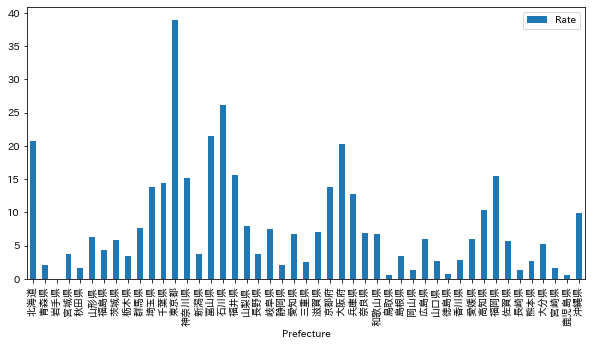

In [118]:
# 棒グラフ
covid.plot.bar(x='Prefecture', y=['Rate'], figsize=(10,5));

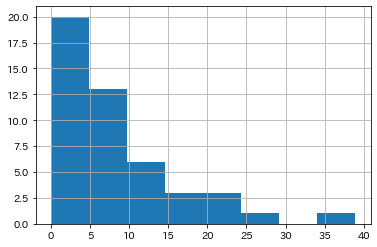

In [119]:
# ヒストグラム
covid['Rate'].hist(bins=8);

In [120]:
# 記述統計
covid['Rate'].describe()

count    47.000000
mean      8.061270
std       7.818461
min       0.000000
25%       2.697445
50%       5.938494
75%      11.533154
max      38.931798
Name: Rate, dtype: float64

In [139]:
#平均値, 中央値, 偏差, 最小, 最大
print(covid['Rate'].mean(),covid['Rate'].median(), covid['Rate'].std(), covid['Rate'].min(), covid['Rate'].max())

8.06126985906177 5.938494167550371 7.81846102705437 0.0 38.93179830953075


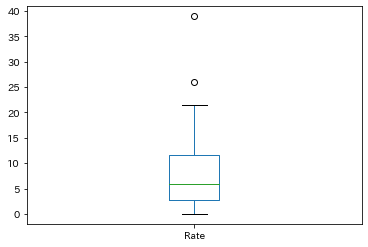

In [140]:
# 箱ヒゲ図
covid['Rate'].plot.box();

In [141]:
# 歪度と尖度
print(covid['Rate'].skew(), covid['Rate'].kurt())

1.8494220365729628 4.327578043438196


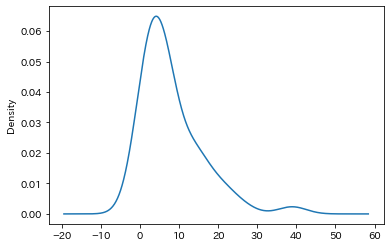

In [142]:
# 分布のカーネル密度推定
covid['Rate'].plot.kde();

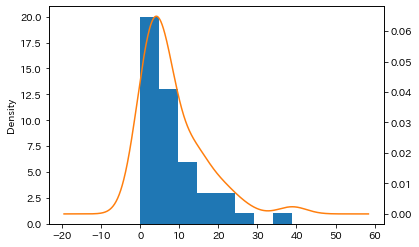

In [143]:
# ヒストグラムと分布
covid["Rate"].plot(kind="hist", bins=8)
covid["Rate"].plot(kind="kde", secondary_y=True);

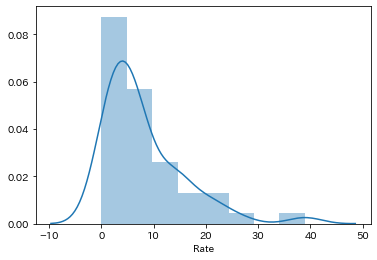

In [144]:
# ヒストグラムと分布
sns.distplot(covid['Rate'], bins=8);

In [145]:
# 相関係数
covid.corr()

,Population,Patients,Rate
Population,1.000000,0.870339,0.658361
Patients,0.870339,1.000000,0.781446
Rate,0.658361,0.781446,1.000000


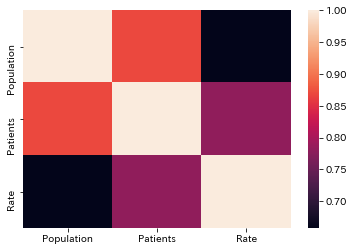

In [146]:
# ヒートマップ
sns.heatmap(data=covid.corr());

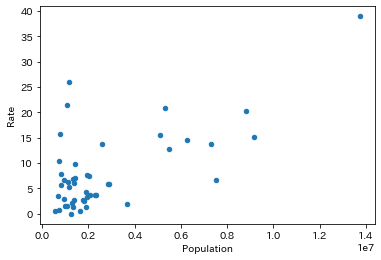

In [147]:
# 散布図
covid.plot.scatter(x='Population', y='Rate');

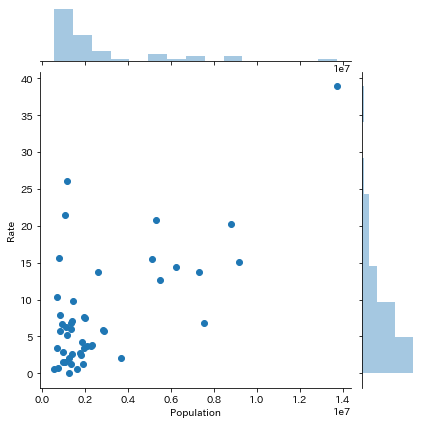

In [130]:
# 散布図
sns.jointplot(x='Population', y='Rate', data=covid);

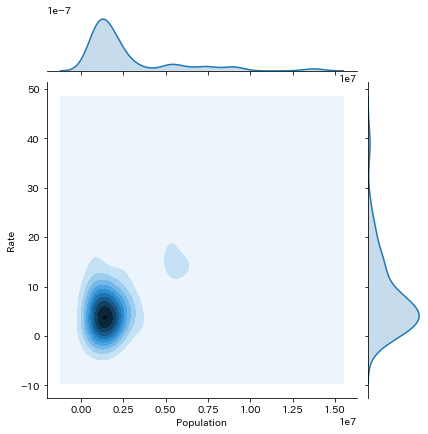

In [131]:
# カーネル密度推定
sns.jointplot(x='Population', y='Rate', data=covid, kind='kde');

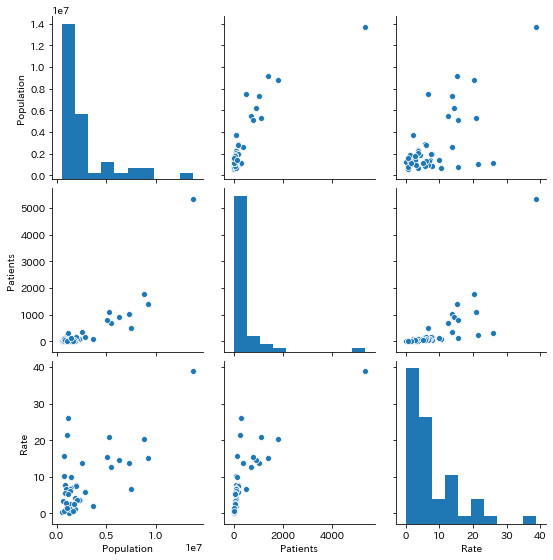

In [132]:
# 散布図
sns.pairplot(data=covid);

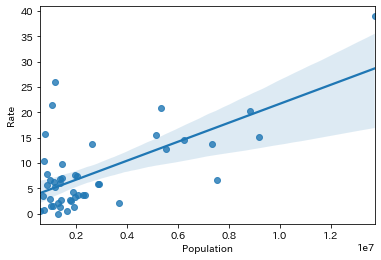

In [133]:
# 回帰直線
sns.regplot(x='Population', y='Rate', data=covid);

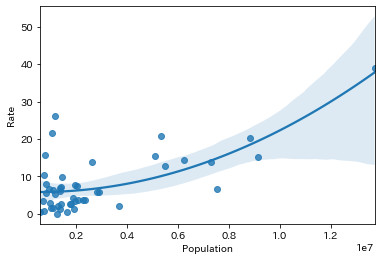

In [134]:
# 回帰曲線（2次の多項式）
sns.regplot(x='Population', y='Rate', data=covid, order=2);

In [135]:
# 都道府県の色分け
covid.loc[covid['Rate'] >= covid['Rate'].quantile(.75), 'color']='red'
covid.loc[(covid['Rate'] < covid['Rate'].quantile(.75)) & (covid['Rate'] >= covid['Rate'].quantile(.25)), 'color']='blue'
covid.loc[(covid['Rate'] < covid['Rate'].quantile(.25)), 'color']='green'
covid.head()

,Prefecture,Population,Patients,Rate,color
0,北海道,5320000,1105,20.770677,red
1,青森県,1278000,27,2.112676,green
2,岩手県,1255000,0,0.000000,green
3,宮城県,2323000,88,3.788205,blue
4,秋田県,996000,16,1.606426,green


In [136]:
#!pip install japanmap

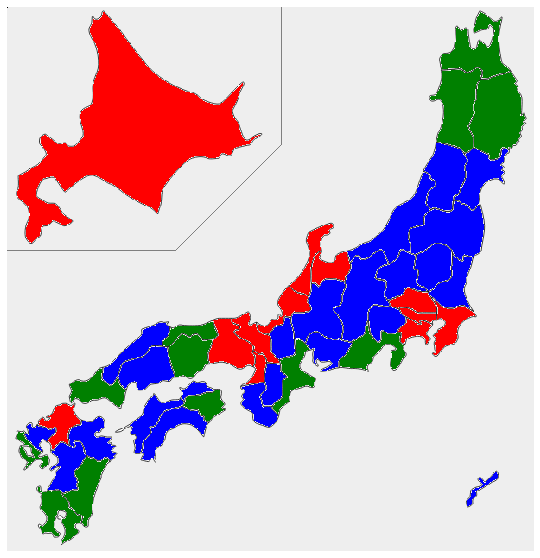

In [137]:
# 地図の可視化
import japanmap as jm
pref_colors={p:c for p, c in zip(covid['Prefecture'].values, covid['color'].values)}
image=jm.picture(pref_colors)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off');

北陸の感染者、なぜ多い？　大家族、共働き要因か

https://www.jiji.com/jc/article?k=2020051500684&g=soc